In [91]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [92]:
df = pd.read_csv("../Datasets/Position_Salaries.csv")

In [93]:
df.dtypes

Position    object
Level        int64
Salary       int64
dtype: object

In [94]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [95]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [96]:
df.round(2)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [97]:
# Making the Xs and y variables
y = df['Salary']

Xs = df.drop(['Salary', 'Position'], axis=1)

In [98]:
# Importing the SVR library
from sklearn.svm import SVR

In [99]:
regressor = SVR()

In [100]:
from collections import defaultdict
d = defaultdict(list)

In [101]:
# There are a couple of kernels that can work in the problem (let's try them all)
# the possible 'linear', 'poly', 'rbf', 'sigmoid'


regressions = defaultdict(list)
possible_kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for ker in possible_kernels:
    
    regressor = SVR(kernel=ker)
    regressor.fit(Xs, y)
    
    regressions[ker].append(regressor)
    

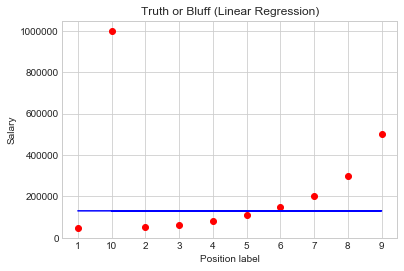

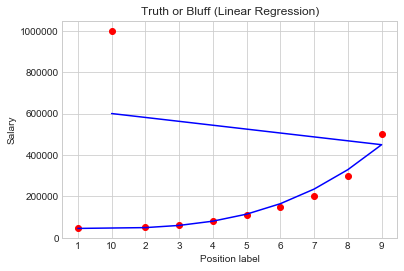

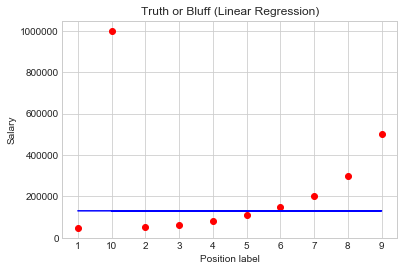

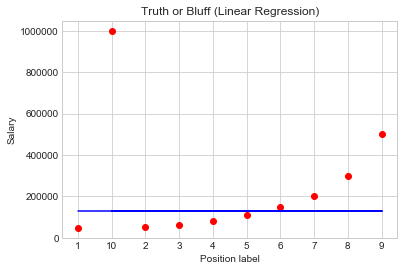

In [102]:
# Graphing all the results
for ker in possible_kernels:
    
    plt.scatter(Xs, y, c='red')
    plt.plot(Xs, regressions[ker][0].predict(Xs), c='blue')
    plt.title("Truth or Bluff (Linear Regression)")
    plt.xlabel('Position label')
    plt.ylabel('Salary')
    plt.show()

- The thing with the model is that for SVM, it does not include feature scaling. This is because a less common model

In [103]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

# Creating the fitting
Xs = sc_X.fit_transform(Xs)
y = sc_y.fit_transform(y.reshape(-1, 1))

# Redo the entire code with the code

/Users/Karen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/Users/Karen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [104]:
# There are a couple of kernels that can work in the problem (let's try them all)
# the possible 'linear', 'poly', 'rbf', 'sigmoid'

    
regressions_2 = defaultdict(list)

for ker in possible_kernels:
    
    regressor = SVR(kernel=ker)
    regressor.fit(Xs, y)
    
    regressions_2[ker].append(regressor)
    

/Users/Karen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


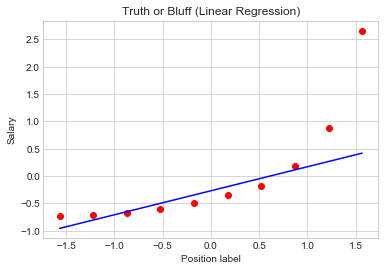

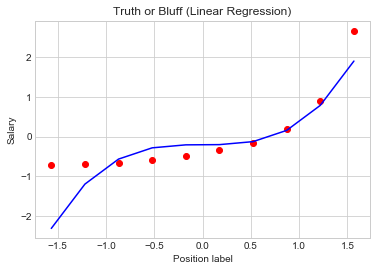

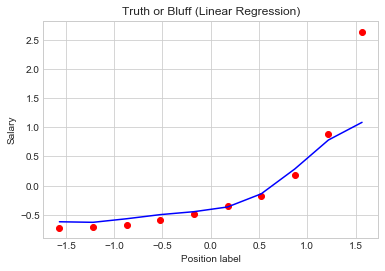

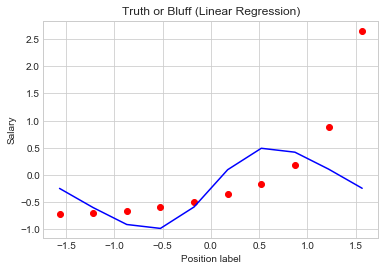

In [105]:
# Graphing all the results
for ker in possible_kernels:
    
    plt.scatter(Xs, y, c='red')
    plt.plot(Xs, regressions_2[ker][0].predict(Xs), c='blue')
    plt.title("Truth or Bluff (Linear Regression)")
    plt.xlabel('Position label')
    plt.ylabel('Salary')
    plt.show()

In [106]:
# to predict for 6.5, remember that you scale this too
for ker in possible_kernels:
    y_pred = sc_y.inverse_transform(regressions_2[ker][0].predict(sc_X.transform(np.array([[6.5]]))))
    print("{0} tell us that the salary of the person should be {1:.2f}".format(ker, y_pred[0]))

linear tell us that the salary of the person should be 216903.83
poly tell us that the salary of the person should be 197301.33
rbf tell us that the salary of the person should be 170370.02
sigmoid tell us that the salary of the person should be 350649.45


- The thing about this is that the number does not tell us much because we have scaled it down
- Must scale it down